### Importing the necessary  packages

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Removal of unnecessary attributes

In [2]:
data=sns.load_dataset('titanic')
data.drop(['who','adult_male','deck','alive','alone','embark_town','class'],axis=1,inplace=True)
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


## 1. Examine a dataset and classify variables by their type: quantitative vs. categorical

### Classfication of Numerical and Categorical attributes

In [3]:
def get_var_category(data):
    unique_count=data.nunique(dropna=False)
    total_count=len(data)
    if pd.api.types.is_numeric_dtype(data):
        return "Numerical"
    elif pd.api.types.is_datetime64_dtype(data):
        return "Date"
    elif unique_count==total_count:
        return "Text(Unique)"
    else:
        return "Categorical"
    
def print_categories(df):
    for column_name in df.columns:
        print(column_name, ": ", get_var_category(df[column_name]))
print_categories(data)

survived :  Numerical
pclass :  Numerical
sex :  Categorical
age :  Numerical
sibsp :  Numerical
parch :  Numerical
fare :  Numerical
embarked :  Categorical


## 2. Handle categorical variables with numerically coded values

### Assigning male as 0 female as 1

In [4]:
data['sex']=data['sex'].map({'male':0,'female':1})

In [5]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S
887,1,1,1,19.0,0,0,30.0000,S
888,0,3,1,NaN,1,2,23.4500,S
889,1,1,0,26.0,0,0,30.0000,C


In [6]:
data.dtypes

survived      int64
pclass        int64
sex           int64
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

### Assigning Southampton city(S) as 0 Cherbourg(C) as 1 and Queenstown(Q) as 2

In [7]:
data['embarked']=data['embarked'].map({'S':3,'C':1,'Q':2})

In [8]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,0,22.0,1,0,7.2500,3.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,3.0
3,1,1,1,35.0,1,0,53.1000,3.0
4,0,3,0,35.0,0,0,8.0500,3.0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,3.0
887,1,1,1,19.0,0,0,30.0000,3.0
888,0,3,1,NaN,1,2,23.4500,3.0
889,1,1,0,26.0,0,0,30.0000,1.0


In [9]:
data['embarked']=data['embarked'].astype('Int64')

In [10]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,0,22.0,1,0,7.2500,3
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,3
3,1,1,1,35.0,1,0,53.1000,3
4,0,3,0,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,3
887,1,1,1,19.0,0,0,30.0000,3
888,0,3,1,NaN,1,2,23.4500,3
889,1,1,0,26.0,0,0,30.0000,1


In [11]:
data.dtypes

survived      int64
pclass        int64
sex           int64
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      Int64
dtype: object

## 3. Perform univariate and bivariate analysis and derive meaningful insights about the dataset

## 3.1. Univariate Analysis

### 3.1.1.  Numerical Variables

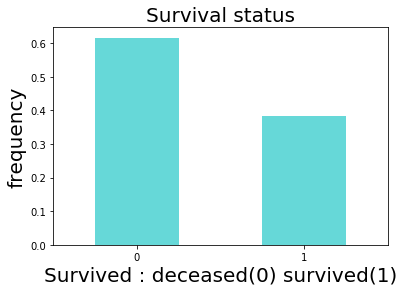

In [12]:
data.survived.value_counts(normalize=True).plot(color='c',alpha=0.6,kind='bar')
plt.xlabel('Survived : deceased(0) survived(1)',size=20)
plt.ylabel('frequency',size=20)
plt.title('Survival status',size=20)
plt.xticks(rotation=0)
plt.show()

* Above graph shows, the total survived (male+female) are around 35-40% and not survived (male+female) are around 60%

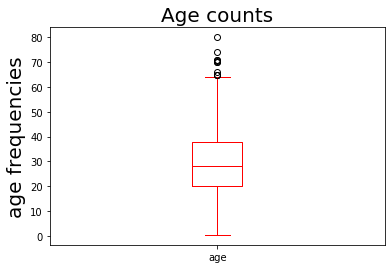

In [13]:
data.age.plot(color='r',kind='box')
plt.ylabel('age frequencies',size=20)
plt.title('Age counts',size=20)
plt.show()

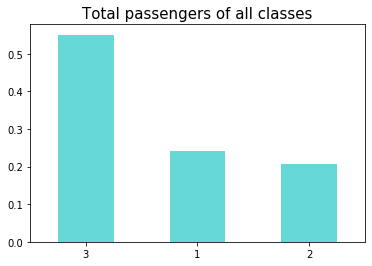

In [14]:
data.pclass.value_counts(normalize=True).plot(color='c',alpha=0.6,kind='bar')
plt.xticks(rotation=0)
plt.title("Total passengers of all classes",size=15)
plt.show()

* Above graphs shows total 1st,2nd and 3rd class people on the ship (survived+deceased)
* Around 60% from 3rd class,and 20-20% of 1st and 2nd class onboarded

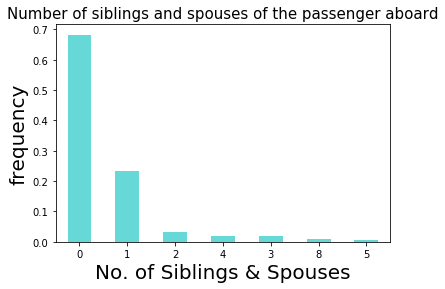

In [15]:
data.sibsp.value_counts(normalize=True).plot(color='c',alpha=0.6,kind='bar')
plt.xticks(rotation=0)
plt.title("Number of siblings and spouses of the passenger aboard",size=15)
plt.xlabel('No. of Siblings & Spouses',size=20)
plt.ylabel('frequency',size=20)
plt.show()

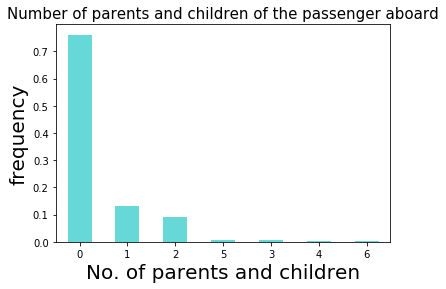

In [16]:
data.parch.value_counts(normalize=True).plot(color='c',alpha=0.6,kind='bar')
plt.xticks(rotation=0)
plt.title("Number of parents and children of the passenger aboard",size=15)
plt.xlabel('No. of parents and children',size=20)
plt.ylabel('frequency',size=20)
plt.show()

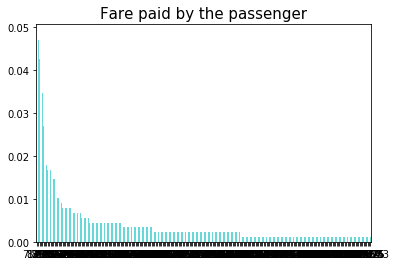

In [17]:
data.fare.value_counts(normalize=True).plot(color='c',alpha=0.6,kind='bar')
plt.xticks(rotation=0)
plt.title("Fare paid by the passenger",size=15)
plt.show()

### 3.1.2. Categorical Variables

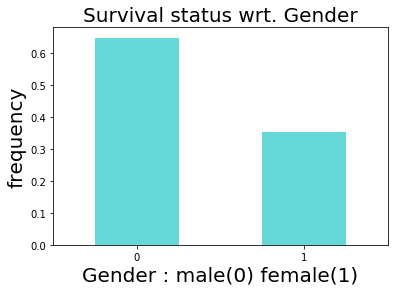

In [18]:
data.sex.value_counts(normalize=True).plot(color='c',alpha=0.6,kind='bar')
plt.xlabel('Gender : male(0) female(1)',size=20)
plt.ylabel('frequency',size=20)
plt.title('Survival status wrt. Gender',size=20)
plt.xticks(rotation=0)
plt.show()

* Above graph shows total men and women ratio on the ship 

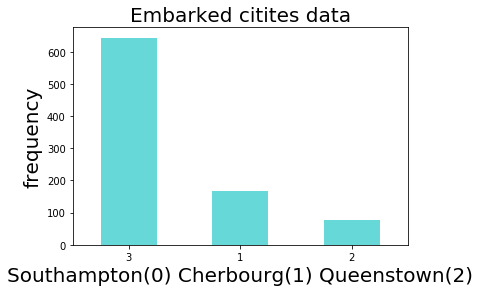

In [19]:
data.embarked.value_counts().plot(color='c',alpha=0.6,kind='bar')
plt.xlabel('Southampton(0) Cherbourg(1) Queenstown(2)',size=20)
plt.ylabel('frequency',size=20)
plt.title("Embarked citites data",size=20)
plt.xticks(rotation=0)
plt.show()

* Above graph shows, total survived(male+female) are around 35-40% and not survived(male+female) are around 60%

## 3.2. Bivariate Analysis

### 3.2.1. Numerical & Numerical Variables

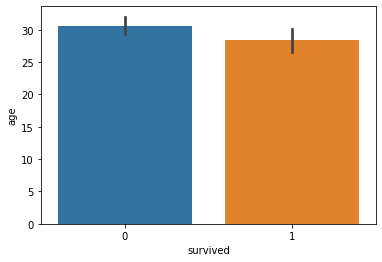

In [20]:
sns.barplot(x='survived',y='age',data=data)
plt.show()

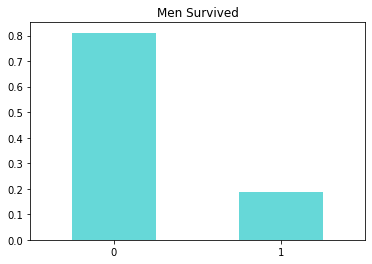

In [21]:
data.survived[data.sex==0].value_counts(normalize=True).plot(color='c',alpha=0.6,kind='bar')
plt.xticks(rotation=0)
plt.title("Men Survived")
plt.show()

 * Above graph shows that total of 15-20% of males were survived rest not.

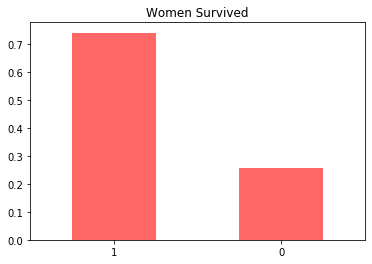

In [22]:
data.survived[data.sex==1].value_counts(normalize=True).plot(color='r',alpha=0.6,kind='bar')
plt.xticks(rotation=0)
plt.title("Women Survived")
plt.show()

* Above graph shows that total of 70-75% of survivors were females and 5-30% were deceased

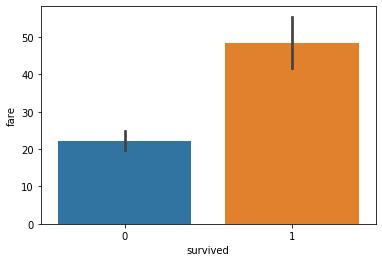

In [23]:
sns.barplot(x='survived',y='fare',data=data)
plt.show()

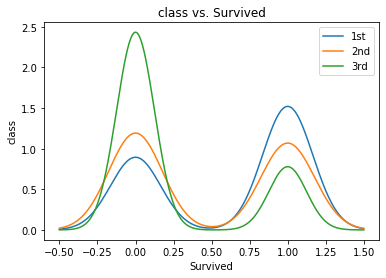

In [24]:
for x in [1,2,3]:
    data.survived[data.pclass==x].plot(kind='kde')
    
plt.xlabel('Survived')
plt.ylabel('class')
plt.title('class vs. Survived')
plt.legend(('1st','2nd','3rd'))
plt.show()

* Above graphs shows most of the passengers of 3rd class(green line) were deceased after 'em 2nd class and then first
* while another distribution on the right shows most of the passengers of 1st class(blue line) were survived then 2nd then 1st

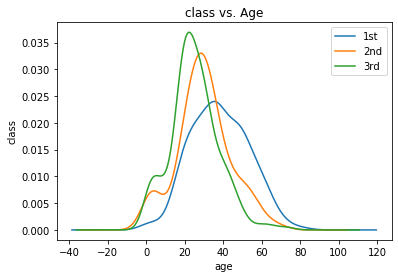

In [25]:
for x in [1,2,3]:
    data.age[data.pclass==x].plot(kind='kde')
plt.xlabel('age')
plt.ylabel('class')
plt.title("class vs. Age")
plt.legend(('1st','2nd','3rd'))
plt.show()

* blue line shows that 1st class most of the passengers have age 38-40
* orange line shows that 2nd class most of the passengers have age 25-40(most of them)
* green line shows that 3rd class passengers have age 20-40(mostly)

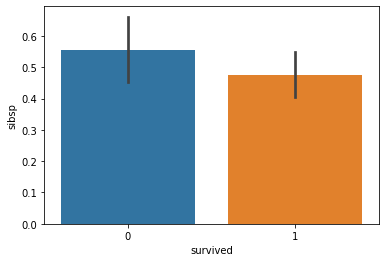

In [26]:
sns.barplot(x='survived',y='sibsp',data=data)
plt.show()

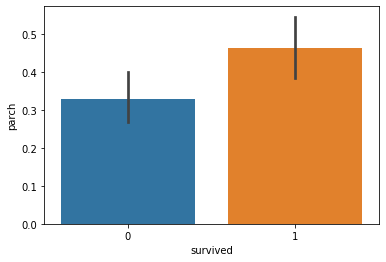

In [27]:
sns.barplot(x='survived',y='parch',data=data)
plt.show()

### 3.2.2.  Numerical & Categorical

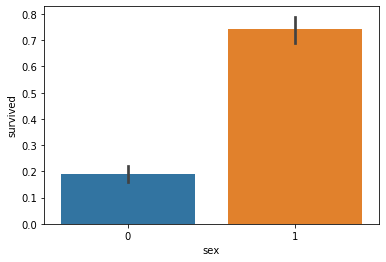

In [28]:
sns.barplot(x='sex',y='survived',data=data)
plt.show()

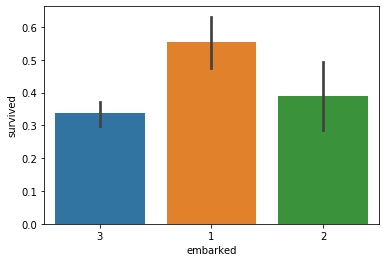

In [29]:
sns.barplot(x='embarked',y='survived',data=data)
plt.show()

## 4.  Identify and treat missing values and remove dataset outliers

In [30]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,0,22.0,1,0,7.2500,3
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,3
3,1,1,1,35.0,1,0,53.1000,3
4,0,3,0,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,3
887,1,1,1,19.0,0,0,30.0000,3
888,0,3,1,NaN,1,2,23.4500,3
889,1,1,0,26.0,0,0,30.0000,1


In [31]:
data.fillna(method='bfill',inplace=True)
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,0,22.0,1,0,7.2500,3
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,3
3,1,1,1,35.0,1,0,53.1000,3
4,0,3,0,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,3
887,1,1,1,19.0,0,0,30.0000,3
888,0,3,1,26.0,1,2,23.4500,3
889,1,1,0,26.0,0,0,30.0000,1


In [32]:
data.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

* There is no missing values

In [33]:
data.describe()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.870561,0.523008,0.381594,32.204208,2.534231
std,0.486592,0.836071,0.477990,14.597668,1.102743,0.806057,49.693429,0.793021
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.910400,2.000000
50%,0.000000,3.000000,0.000000,29.000000,0.000000,0.000000,14.454200,3.000000
75%,1.000000,3.000000,1.000000,39.000000,1.000000,0.000000,31.000000,3.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    int64  
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    Int64  
dtypes: Int64(1), float64(2), int64(5)
memory usage: 56.7 KB


## 5. Build a correlation matrix to identify relevant variables ( Graph )

In [35]:
# correlation matrix
correlation_mat = data.corr()
correlation_mat

,survived,pclass,sex,age,sibsp,parch,fare,embarked
survived,1.000000,-0.338481,0.543351,-0.055505,-0.035322,0.081629,0.257307,-0.170943
pclass,-0.338481,1.000000,-0.131900,-0.295367,0.083081,0.018443,-0.549500,0.166223
sex,0.543351,-0.131900,1.000000,-0.061342,0.114631,0.245489,0.182333,-0.111894
age,-0.055505,-0.295367,-0.061342,1.000000,-0.204810,-0.161386,0.085406,-0.028461
sibsp,-0.035322,0.083081,0.114631,-0.204810,1.000000,0.414838,0.159651,0.069444
parch,0.081629,0.018443,0.245489,-0.161386,0.414838,1.000000,0.216225,0.041064
fare,0.257307,-0.549500,0.182333,0.085406,0.159651,0.216225,1.000000,-0.227015
embarked,-0.170943,0.166223,-0.111894,-0.028461,0.069444,0.041064,-0.227015,1.000000


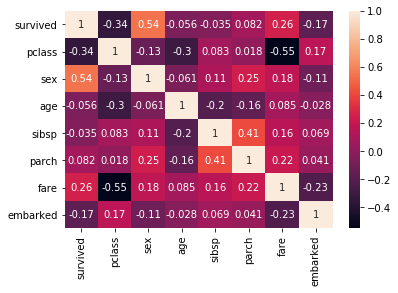

In [36]:
correlation_mat = data.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

#### The above heatmap shows dependency between Sex and Survived and the correlation value is 0.54. And we can also see the overall distribution of every attribute with respect to that of another.

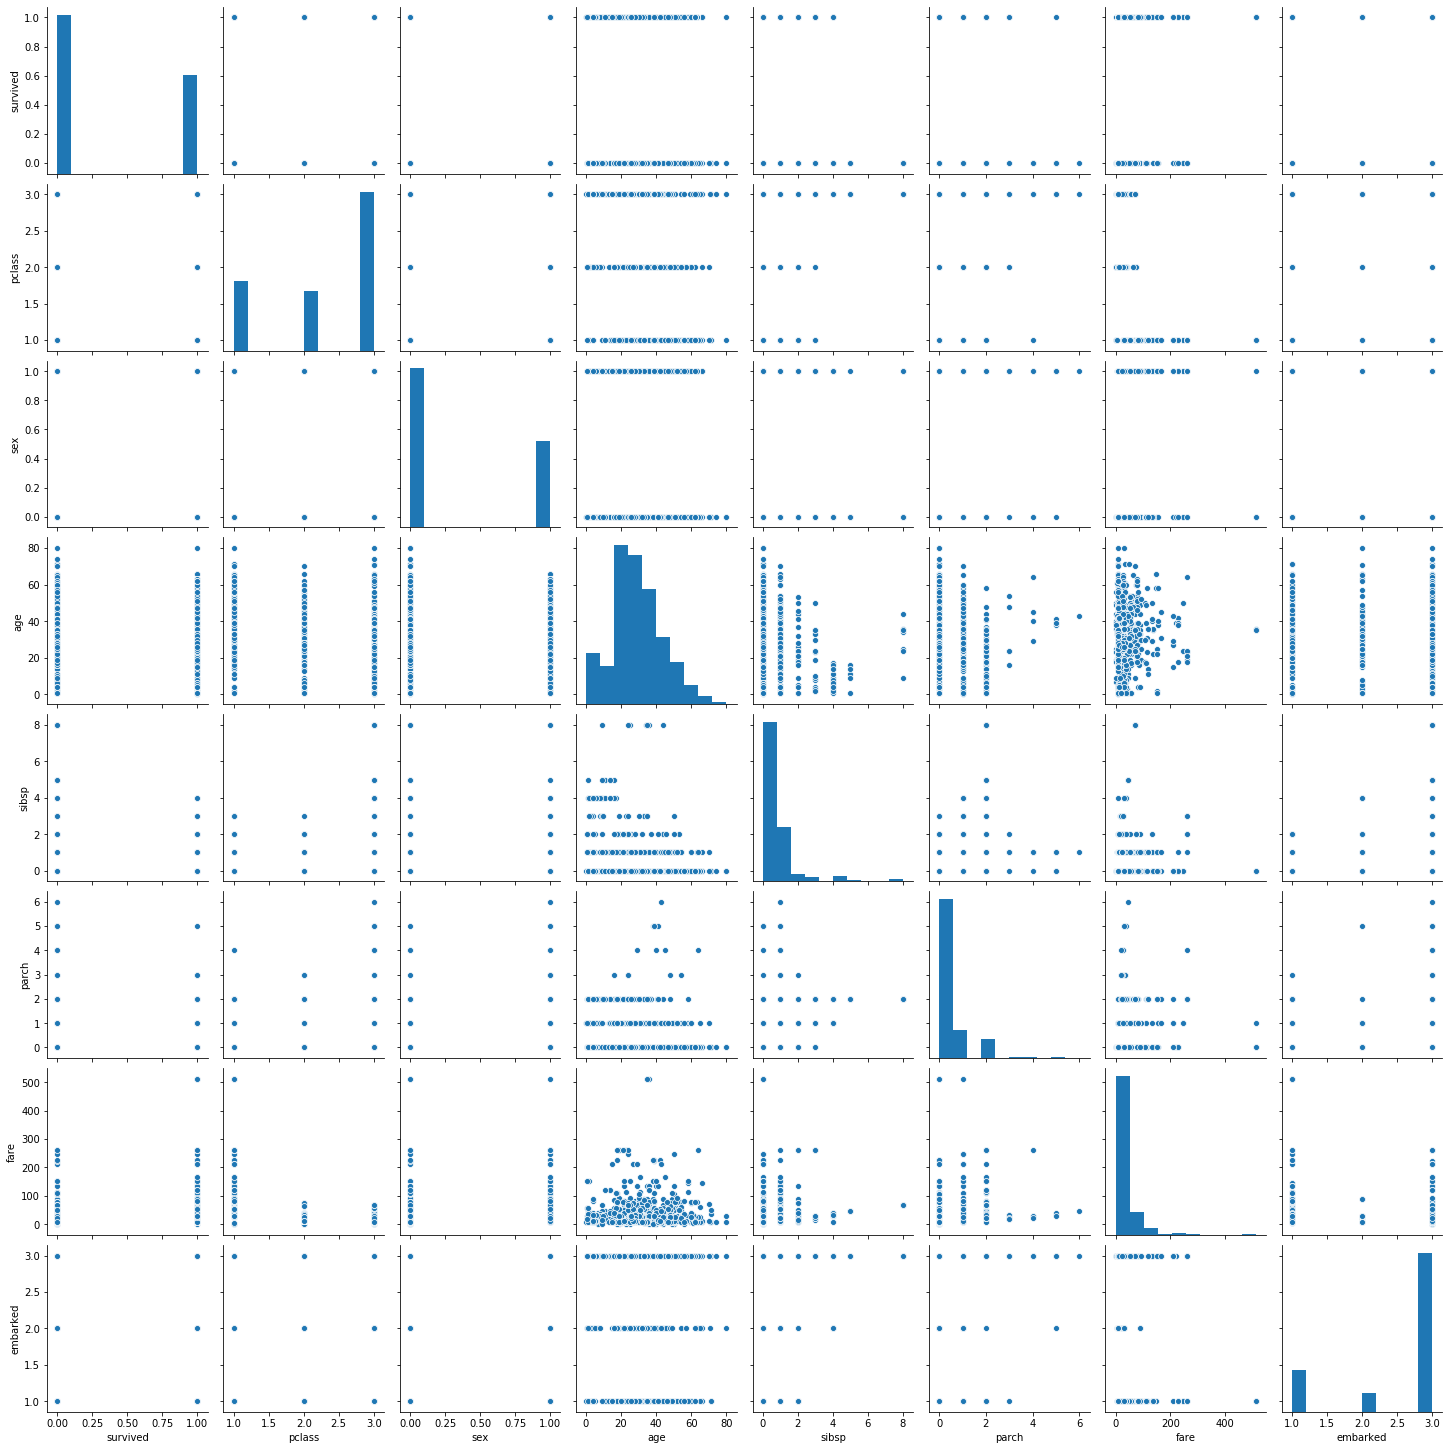

In [37]:
sns.pairplot(data)
plt.show()